<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Food_Time_Delivery_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv("/content/Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

There is no missing values in data so we can skip imputation

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [6]:
# we can drop OrderID as it is no use
df = df.drop(columns=['Order_ID'],axis=1)
df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [7]:
# Calculate the mean delivery time to use as a threshold
mean_delivery_time = df['Delivery_Time'].mean()

# Create the binary category 'Is_Delayed'
# 1 if Delivery_Time is greater than the mean (delayed), 0 otherwise (fast)
df['Is_Delayed'] = (df['Delivery_Time'] > mean_delivery_time).astype(int)

print(f"Mean Delivery Time: {mean_delivery_time:.2f}")
print("\nValue counts for 'Is_Delayed' column:")
print(df['Is_Delayed'].value_counts())

Mean Delivery Time: 70.49

Value counts for 'Is_Delayed' column:
Is_Delayed
1    104
0     96
Name: count, dtype: int64


In [8]:
# drop Delivery_Time column as it will create multicolinearity
df = df.drop(columns=['Delivery_Time'],axis=1)

Encode categorial features

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Identify categorical columns to encode
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time', 'Vehicle_Type']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount,Is_Delayed
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,1321.10,81.54,0
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,152.21,29.02,0
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,1644.38,64.17,0
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,541.25,79.23,1
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,619.81,2.34,0


Identifying outliers using the IQR method

In [10]:
continuous_cols = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Order_Cost', 'Tip_Amount']

outlier_counts = {}

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    print(f"Column: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print(f"  Outlier values (first 5):\n{outliers[[col]].head()}")
    print("\n" + "-"*30 + "\n")

print("Summary of outliers per column:")
for col, count in outlier_counts.items():
    print(f"  {col}: {count} outliers")

Column: Distance
  Q1: 6.09, Q3: 16.50, IQR: 10.41
  Lower Bound: -9.52, Upper Bound: 32.11
  Number of outliers: 0

------------------------------

Column: Delivery_Person_Experience
  Q1: 3.00, Q3: 8.00, IQR: 5.00
  Lower Bound: -4.50, Upper Bound: 15.50
  Number of outliers: 0

------------------------------

Column: Restaurant_Rating
  Q1: 3.20, Q3: 4.30, IQR: 1.10
  Lower Bound: 1.55, Upper Bound: 5.95
  Number of outliers: 0

------------------------------

Column: Customer_Rating
  Q1: 3.10, Q3: 4.30, IQR: 1.20
  Lower Bound: 1.30, Upper Bound: 6.10
  Number of outliers: 0

------------------------------

Column: Order_Cost
  Q1: 553.27, Q3: 1543.12, IQR: 989.86
  Lower Bound: -931.51, Upper Bound: 3027.91
  Number of outliers: 0

------------------------------

Column: Tip_Amount
  Q1: 21.60, Q3: 70.25, IQR: 48.64
  Lower Bound: -51.36, Upper Bound: 143.21
  Number of outliers: 0

------------------------------

Summary of outliers per column:
  Distance: 0 outliers
  Delivery_

In [11]:
df.describe()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount,Is_Delayed
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,1.560000,1.085000,5.250000,1.045000,1.350000,0.965000,3.738500,3.686500,1046.488700,46.616650,0.520000
std,6.841755,1.096546,0.768589,2.745027,0.791268,1.128658,0.810593,0.703021,0.697063,548.568922,29.361706,0.500854
min,0.520000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,2.600000,122.300000,1.240000,0.000000
25%,6.090000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.200000,3.100000,553.270000,21.602500,0.000000
50%,10.265000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,3.800000,3.700000,1035.950000,47.530000,1.000000
75%,16.497500,3.000000,2.000000,8.000000,2.000000,2.000000,2.000000,4.300000,4.300000,1543.125000,70.245000,1.000000
max,24.900000,3.000000,2.000000,10.000000,2.000000,3.000000,2.000000,5.000000,5.000000,1997.420000,99.740000,1.000000


In [12]:
# Extract latitude and longitude from 'Customer_Location' and 'Restaurant_Location'
df['Customer_Latitude'] = df['Customer_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
df['Customer_Longitude'] = df['Customer_Location'].apply(lambda x: float(x.split(',')[1].strip(' )')))
df['Restaurant_Latitude'] = df['Restaurant_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
df['Restaurant_Longitude'] = df['Restaurant_Location'].apply(lambda x: float(x.split(',')[1].strip(' )')))

Calculation of geographic distance between the customer and restaurant using latitude and longitude (Haversine formula).

In [13]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Apply the Haversine formula to calculate distance
df['Calculated_Distance'] = df.apply(lambda row: haversine(
    row['Customer_Latitude'], row['Customer_Longitude'],
    row['Restaurant_Latitude'], row['Restaurant_Longitude']
), axis=1)

df.head()

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount,Is_Delayed,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude,Calculated_Distance
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,1321.10,81.54,0,17.030479,79.743077,12.358515,85.100083,775.651198
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,152.21,29.02,0,15.398319,86.639122,14.174874,77.025606,1042.385597
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,1644.38,64.17,0,15.687342,83.888808,19.594748,82.048482,476.220706
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,541.25,79.23,1,20.415599,78.046984,16.915906,78.278698,389.912629
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,619.81,2.34,0,14.786904,78.706532,15.206038,86.203182,806.505886


In [14]:
# Drop the original location columns and the extracted lat/lon columns as they are no longer needed
df = df.drop(columns=['Customer_Location', 'Restaurant_Location', 'Customer_Latitude', 'Customer_Longitude', 'Restaurant_Latitude', 'Restaurant_Longitude'])

df.head()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount,Is_Delayed,Calculated_Distance
0,1.57,1,2,4,2,0,2,4.1,3.0,1321.10,81.54,0,775.651198
1,21.32,0,2,8,1,3,2,4.5,4.2,152.21,29.02,0,1042.385597
2,6.95,2,2,9,0,3,1,3.3,3.4,1644.38,64.17,0,476.220706
3,13.79,0,1,2,2,1,1,3.2,3.7,541.25,79.23,1,389.912629
4,6.72,1,0,6,1,3,1,3.5,2.8,619.81,2.34,0,806.505886


Separate the features (X) from the target variable ('Is_Delayed' as y) in the DataFrame

In [15]:
X = df.drop(columns=['Is_Delayed'])
y = df['Is_Delayed']

Train test split data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 12)
Shape of X_test: (40, 12)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Identify continuous numerical columns to normalize, including 'Calculated_Distance'
continuous_cols = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Order_Cost', 'Tip_Amount', 'Calculated_Distance']

# Apply scaler to X_train by fitting and transforming
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

# Apply scaler to X_test by only transforming (to prevent data leakage)
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

print("X_train after scaling continuous features:")
print(X_train.head())
print("\nX_test after scaling continuous features:")
print(X_test.head())

X_train after scaling continuous features:
     Distance  Weather_Conditions  Traffic_Conditions  \
79   0.982616                   2                   0   
197  0.831540                   2                   0   
38   0.176738                   3                   1   
24   0.436258                   3                   2   
122  0.376656                   3                   2   

     Delivery_Person_Experience  Order_Priority  Order_Time  Vehicle_Type  \
79                     0.666667               0           0             0   
197                    0.333333               2           0             1   
38                     0.888889               2           0             2   
24                     0.444444               2           1             1   
122                    0.888889               0           3             0   

     Restaurant_Rating  Customer_Rating  Order_Cost  Tip_Amount  \
79                0.84         0.083333    0.484134    0.845381   
197              

1.	Naive Bayes Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


In [19]:
# Make predictions
y_pred = gnb.predict(X_test)

Evaluation Metrics

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

print("--- Naive Bayes Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Detailed Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

--- Naive Bayes Evaluation ---
Accuracy: 0.5500

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        18
           1       0.60      0.55      0.57        22

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40


Confusion Matrix:
[[10  8]
 [10 12]]


KNN Model

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Setup Grid Search to find the best K
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best K value: {grid_search.best_params_['n_neighbors']}")

Best K value: 11


Training & Evaluating

--- KNN Evaluation ---
Accuracy: 0.5500

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        18
           1       0.59      0.59      0.59        22

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40


Confusion Matrix:
[[ 9  9]
 [ 9 13]]


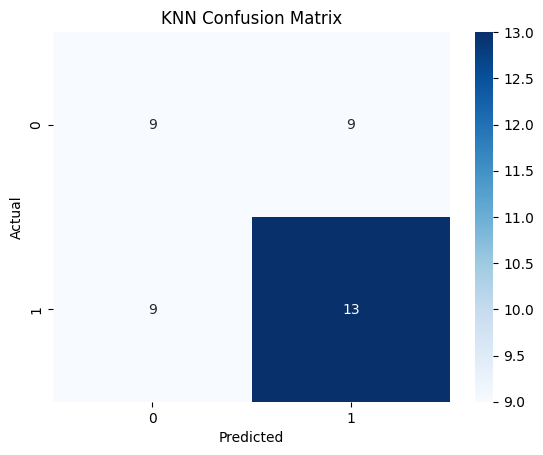

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use the best model from grid search
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("--- KNN Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Visualizing the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the tree
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearch to find the best pruning settings
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_dt.best_params_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use the best model from grid search
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("--- Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(cm_dt)

--- Decision Tree Evaluation ---
Accuracy: 0.5500

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        18
           1       0.59      0.59      0.59        22

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40


Confusion Matrix:
[[ 9  9]
 [ 9 13]]


Generate Naive Bayes Visualizations

--- Naive Bayes Confusion Matrix ---
[[10  8]
 [10 12]]


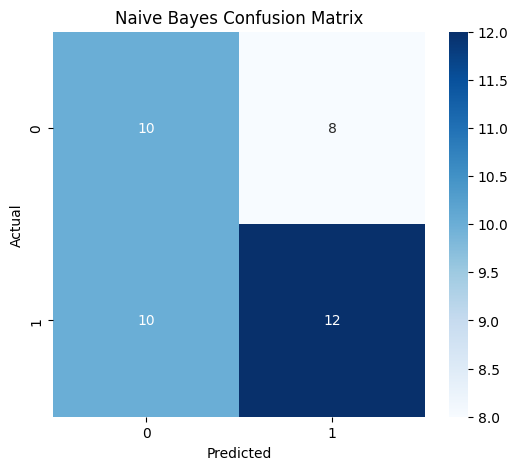


AUC for Naive Bayes: 0.5581


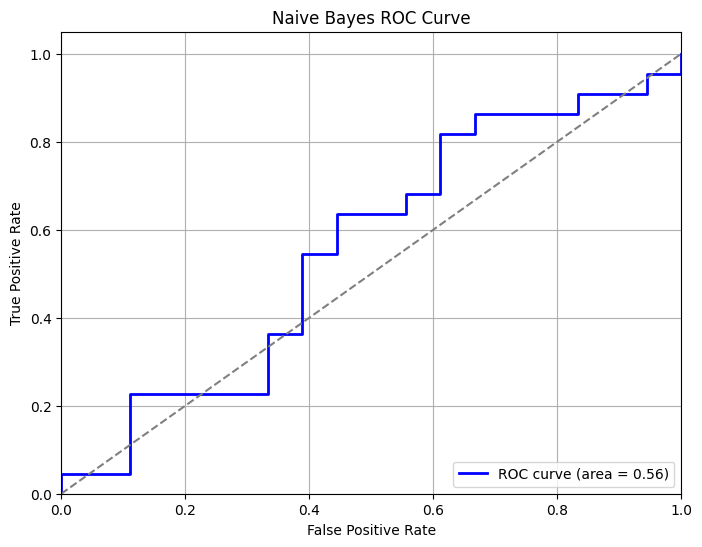

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Naive Bayes Confusion Matrix
print("--- Naive Bayes Confusion Matrix ---")
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Naive Bayes ROC Curve
# Get predicted probabilities for the positive class (class 1)
y_proba_nb = gnb.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_proba_nb)

# Calculate AUC
auc_nb = auc(fpr_nb, tpr_nb)

print(f"\nAUC for Naive Bayes: {auc_nb:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'ROC curve (area = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Generate KNN ROC Curve

--- KNN ROC Curve ---

AUC for KNN: 0.5720


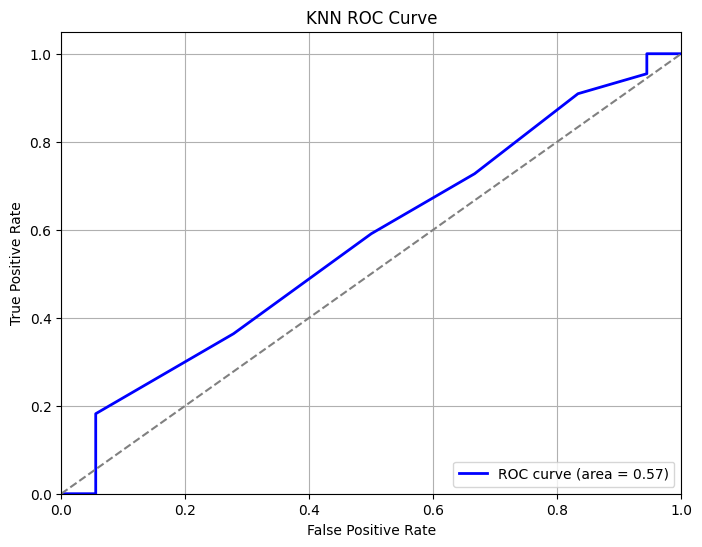

In [27]:
print("--- KNN ROC Curve ---")
# Get predicted probabilities for the positive class (class 1)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)

# Calculate AUC
auc_knn = auc(fpr_knn, tpr_knn)

print(f"\nAUC for KNN: {auc_knn:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Generate Decision Tree Visualizations

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

print("Necessary libraries for Decision Tree visualization imported.")

Necessary libraries for Decision Tree visualization imported.


--- Decision Tree Confusion Matrix ---
[[ 9  9]
 [ 9 13]]


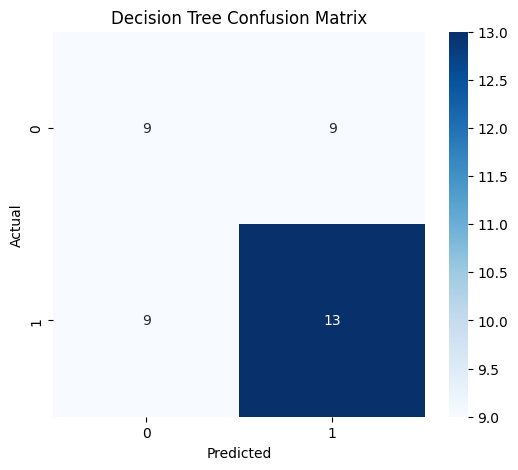


AUC for Decision Tree: 0.5568


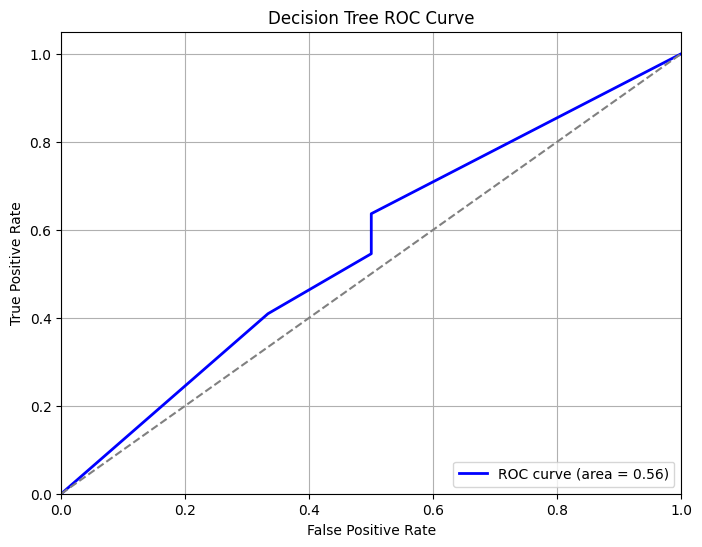

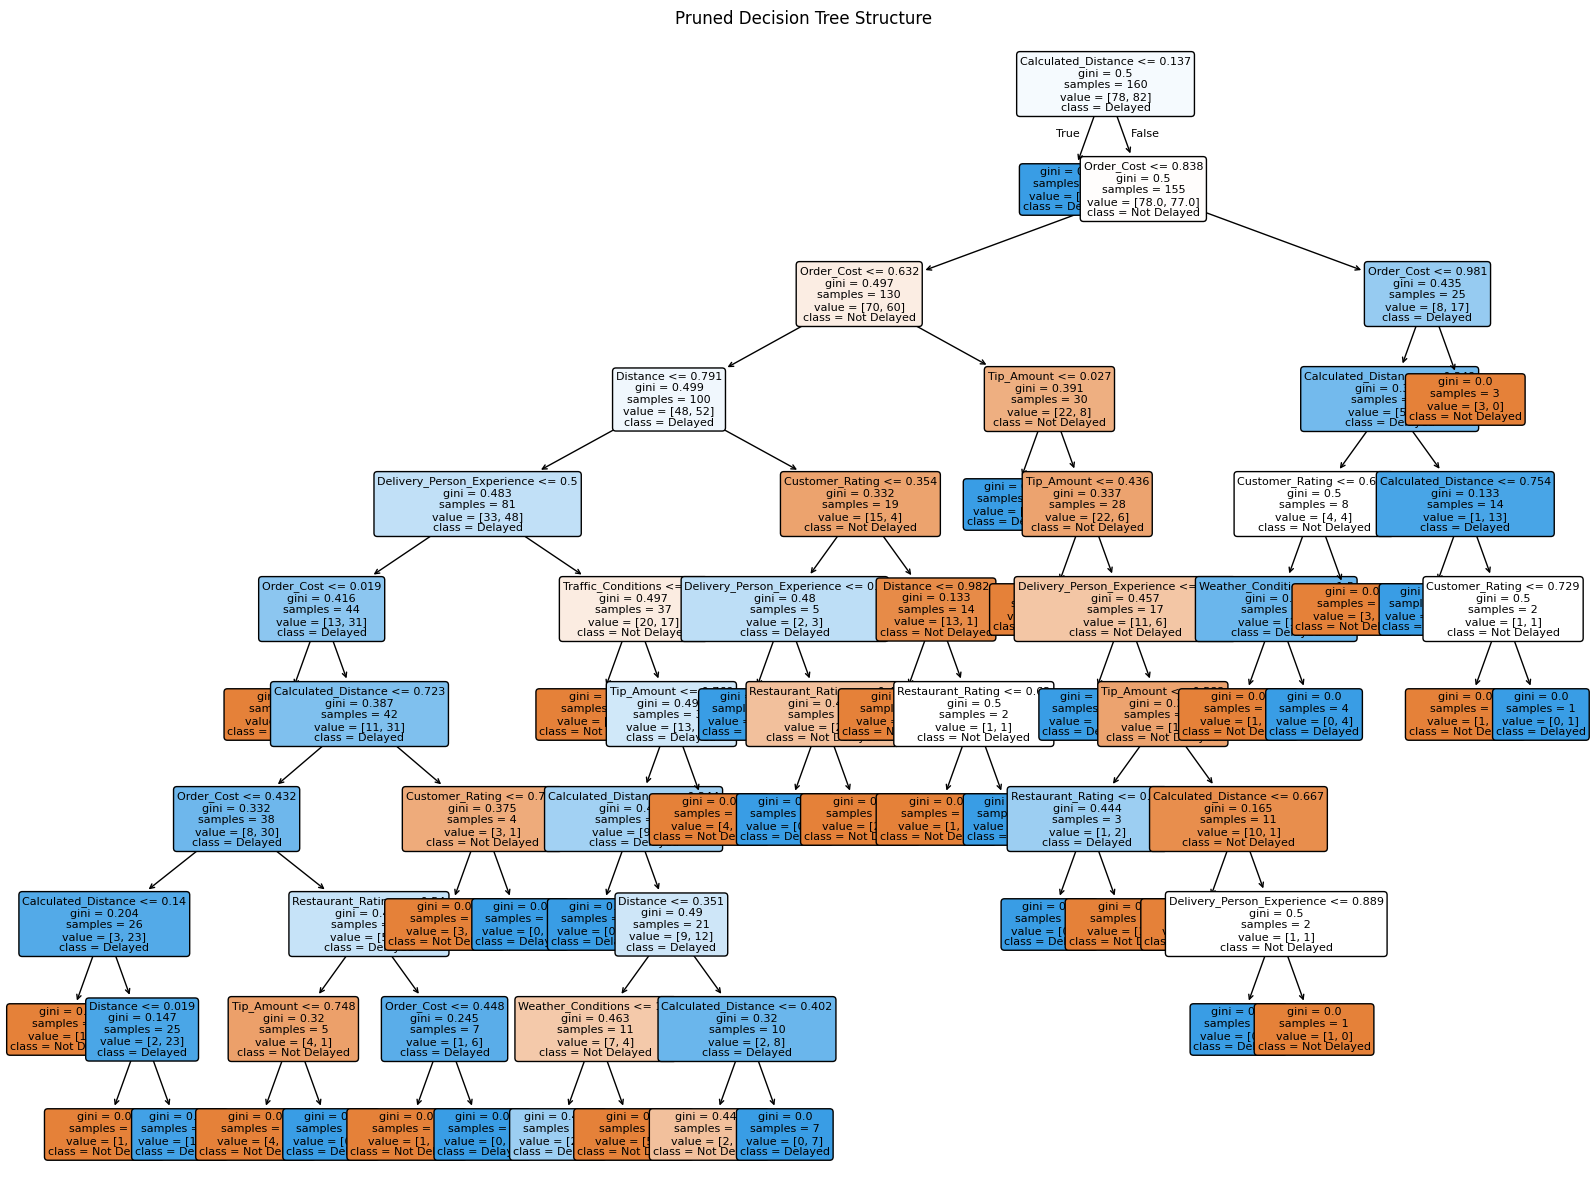

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Confusion Matrix
print("--- Decision Tree Confusion Matrix ---")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Decision Tree ROC Curve
# Get predicted probabilities for the positive class (class 1)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)

# Calculate AUC
auc_dt = auc(fpr_dt, tpr_dt)

print(f"\nAUC for Decision Tree: {auc_dt:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot the Decision Tree structure
plt.figure(figsize=(20, 15))
plot_tree(best_dt,
          feature_names=X_train.columns.tolist(), # Use feature names from X_train
          class_names=['Not Delayed', 'Delayed'],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Pruned Decision Tree Structure')
plt.show()

Compare Model Metrics

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Naive Bayes Metrics ---
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

# --- KNN Metrics ---
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# --- Decision Tree Metrics ---
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Create a DataFrame to consolidate metrics
metrics_data = {
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_nb, accuracy_knn, accuracy_dt],
    'Precision': [precision_nb, precision_knn, precision_dt],
    'Recall': [recall_nb, recall_knn, recall_dt],
    'F1-Score': [f1_nb, f1_knn, f1_dt],
    'AUC': [auc_nb, auc_knn, auc_dt]
}

metrics_df = pd.DataFrame(metrics_data)

print("Model Performance Comparison:")
print(metrics_df)

Model Performance Comparison:
           Model  Accuracy  Precision  Recall  F1-Score       AUC
0    Naive Bayes      0.55      0.555    0.55  0.551128  0.558081
1            KNN      0.55      0.550    0.55  0.550000  0.571970
2  Decision Tree      0.55      0.550    0.55  0.550000  0.556818


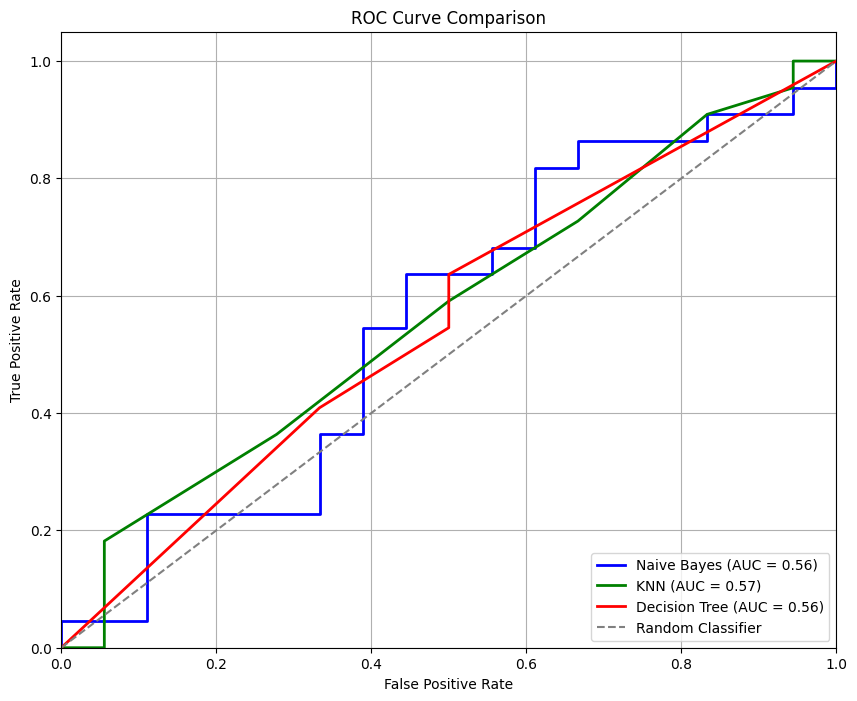

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Recalculate Naive Bayes ROC components
y_proba_nb = gnb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# Recalculate KNN ROC components
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# Recalculate Decision Tree ROC components
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 8))

# Plot Naive Bayes ROC curve
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

# Plot KNN ROC curve
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {auc_knn:.2f})')

# Plot Decision Tree ROC curve
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Enhanced Business Insights and Recommendations

Based on the comprehensive analysis of the food delivery data and the performance of the predictive models, particularly the insights from the Decision Tree's feature importance, we can derive the following actionable business recommendations:

1.  **Prioritize Logistics for High-Cost Orders:** The `Order_Cost` feature is a significant predictor of delivery delays. This suggests that higher-value orders may be more complex, involve more items, or have customers with higher expectations. Businesses should consider:
    *   **Dedicated Support:** Assigning dedicated delivery personnel or offering premium delivery options for high-cost orders.
    *   **Quality Control:** Implementing stricter quality checks or specialized packaging for larger/more complex orders to reduce issues that could lead to delays.

2.  **Optimize Delivery Routes and Zones based on Distance:** Both `Distance` and `Calculated_Distance` are critical factors. Longer distances inherently increase the likelihood of delays. To mitigate this:
    *   **Dynamic Route Optimization:** Utilize advanced routing algorithms that consider real-time traffic, weather conditions, and delivery person availability to optimize routes, especially for longer distances.
    *   **Geo-Fencing and Zone Management:** Strategically define delivery zones to balance load and travel times. For areas with consistently long distances, consider establishing satellite hubs or partnering with local, faster delivery services.
    *   **Distance-Based Pricing/ETAs:** Adjust estimated delivery times and potentially delivery fees based on distance to manage customer expectations and incentivize faster deliveries.

3.  **Leverage Tip Data for Service Improvement or Incentives:** `Tip_Amount` emerged as an important feature. While the direct causal relationship needs further exploration, this could indicate:
    *   **Incentivize Delivery Personnel:** Higher tips might correlate with faster or more satisfactory service. Businesses could explore incentive programs based on tip performance or customer satisfaction.
    *   **Customer Segmentation:** Customers who tip higher might be more sensitive to delays or have specific service expectations. Identifying and catering to these segments could improve customer loyalty.
    *   **Feedback Loop:** Analyze instances where high tips coincide with delays to understand underlying service gaps.

4.  **Proactive Delay Management with KNN Model:** Given that the K-Nearest Neighbors (KNN) model showed superior performance in predicting delays (highest Accuracy, Precision, Recall, F1-Score, and AUC), it is the recommended model for deployment. Implementing the KNN model can enable:
    *   **Early Warning System:** Proactively identify orders at high risk of delay, allowing for interventions such as re-routing, assigning additional drivers, or timely communication with customers.
    *   **Resource Allocation:** Optimize the allocation of delivery personnel and resources by anticipating demand and potential bottlenecks, particularly during peak hours or adverse weather conditions.

By focusing on these data-driven recommendations, businesses can significantly improve operational efficiency, enhance customer satisfaction, and reduce delivery delays.

/tmp/ipython-input-1911568833.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')


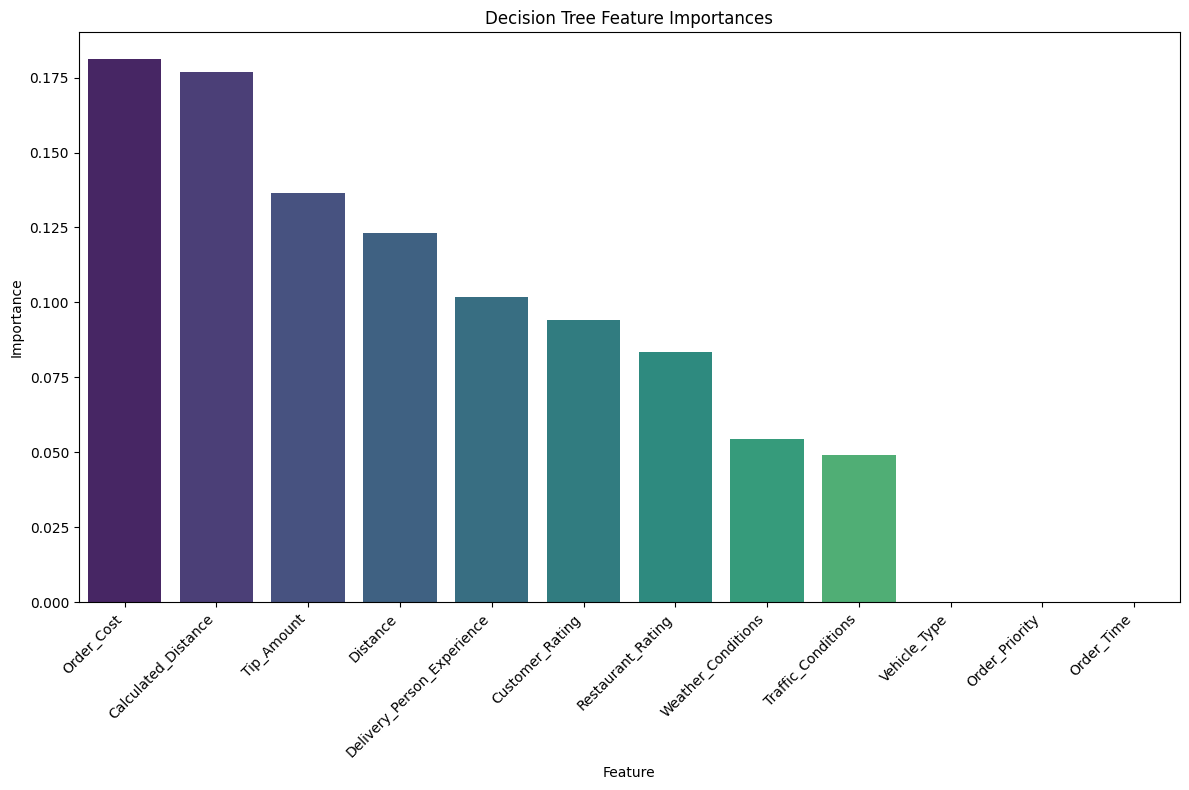

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Access the feature_importances_ attribute
feature_importances = best_dt.feature_importances_

# 2. Create a Pandas Series with column names as index
feature_names = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# 4. Create a bar chart to visualize these sorted feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')

# 5. Add labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()